In [83]:
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [39]:
BASE_DIR = Path.cwd().parent

In [40]:
df_hosts_reviews_en = pd.read_parquet(BASE_DIR / 'staging_data' / 'hosts_reviews_en_cleaned.parquet')

In [41]:
df_hosts_reviews_en.head()

,index,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
0,0,2010-09-06,0.0,32984.0,200247.0,Keenan,great little apartment perfect spot town nice ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
1,1,2010-09-12,0.0,32984.0,126543.0,Olaf,nice flat great area host sorted things make s...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
2,2,2011-05-21,0.0,32984.0,294223.0,Max,great location host responsive email country t...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
3,3,2011-05-28,0.0,32984.0,577190.0,Eli,host place super great close everything quite ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
4,4,2011-06-11,0.0,32984.0,521818.0,Jonathan,nice apartment great location great price br b...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en


In [42]:
df_hosts_reviews_en.groupby('review_scores_rating')['comments'].count().sort_values(ascending=False)

review_scores_rating
5.00    4545
4.92    3528
4.84    2408
4.83    2369
4.86    2198
        ... 
3.40       4
2.50       4
3.75       3
2.00       2
1.50       1
Name: comments, Length: 114, dtype: int64

In [43]:
df_hosts_reviews_en['comments'][1]

'nice flat great area host sorted things make stay smooth easy leaving key neighbours etc thanks'

In [44]:
df_hosts_reviews_en.query('listing_id_encod == 1285')

,index,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
48917,63689,2019-07-15,1285.0,35930154.0,86501510.0,David,apartment welllocated metro 5 min walk host ni...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48918,63690,2019-07-24,1285.0,35930154.0,193898979.0,Ella,hes nice kinda lacking everything else guesbrt...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48919,63691,2019-07-28,1285.0,35930154.0,22855458.0,Salma,good location price however room rented one de...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48920,63692,2022-10-03,1285.0,35930154.0,13501270.0,Haizhou,communication wait apartment without anyone sh...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en


In [45]:
df_hosts_reviews_en.query('review_scores_rating < 3')

,index,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
24986,31709,2017-08-05,638.0,1.836942e+07,13333455.0,Lara,host nice person available time even asked sev...,17283764.0,Madelaine,Familjevänlig lägenhet mkt centralt på kungsho...,...,0.01,0.0,2.0,1.0,1.0,4.00,5.0,5.00,1.0,en
48917,63689,2019-07-15,1285.0,3.593015e+07,86501510.0,David,apartment welllocated metro 5 min walk host ni...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48918,63690,2019-07-24,1285.0,3.593015e+07,193898979.0,Ella,hes nice kinda lacking everything else guesbrt...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48919,63691,2019-07-28,1285.0,3.593015e+07,22855458.0,Salma,good location price however room rented one de...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
48920,63692,2022-10-03,1285.0,3.593015e+07,13501270.0,Haizhou,communication wait apartment without anyone sh...,270253234.0,Mehdi,Room in a large apartment for rent during July...,...,0.11,1.0,2.5,3.5,2.5,3.25,3.5,3.75,3.0,en
49406,64346,2022-06-26,1324.0,3.675865e+07,341209083.0,"O,B",house really dirty smelled horrible,72819688.0,Sam,Big 2 Room Apartment. A very big 2 room apartm...,...,0.11,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,en
52511,68795,2022-08-25,1362.0,3.758750e+07,476240802.0,Jan,dont book phone number host assigned host answer,283964182.0,Sofia,Sovrum med tillgång till hela lägenheten vid b...,...,0.14,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,en
56151,74035,2022-08-10,1574.0,4.354639e+07,98082896.0,Daniel,dont stay herebrbrunless want use place sleep ...,67355594.0,Pernilla,Lustiga huset i Hökarängen! Etagelägenhet med ...,...,0.13,1.0,1.0,1.0,1.0,4.00,2.0,4.00,1.0,en
65129,86391,2022-06-21,2093.0,5.788862e+17,220587752.0,Jonathan,walked supposed smokefree unit reeked smoke sm...,310835509.0,TravelNest,rsta 342 3-4 bed Apartment Stockholm <b>The sp...,...,0.20,2.0,1.5,2.0,1.5,2.00,2.0,1.50,1.5,en
68488,91215,2022-11-01,2497.0,6.924256e+17,452097355.0,Stella,worst experience host since use platform askin...,36019300.0,These,Mysig lägenhet med uteplats mitt i city Välkom...,...,0.20,1.0,2.0,3.0,2.0,1.00,3.0,5.00,2.0,en


In [46]:
import nltk
nltk.download('vader_lexicon')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
a = df_hosts_reviews_en['comments'][63690]

vds.polarity_scores(a)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tatiana.ilyasova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'compound': 0.8126}

In [47]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [48]:
df = df_hosts_reviews_en.head(10000)

In [49]:
df

,index,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
0,0,2010-09-06,0.0,32984.0,200247.0,Keenan,great little apartment perfect spot town nice ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.20,en
1,1,2010-09-12,0.0,32984.0,126543.0,Olaf,nice flat great area host sorted things make s...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.20,en
2,2,2011-05-21,0.0,32984.0,294223.0,Max,great location host responsive email country t...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.20,en
3,3,2011-05-28,0.0,32984.0,577190.0,Eli,host place super great close everything quite ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.20,en
4,4,2011-06-11,0.0,32984.0,521818.0,Jonathan,nice apartment great location great price br b...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.20,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12525,2018-06-10,76.0,1341533.0,71541363.0,Danny,host cozy artistically decorated home great lo...,5866335.0,Per J,Bed & Breakfast on Mariaberget <b>The space</b...,...,0.81,20.0,4.91,4.90,4.78,4.91,4.95,4.98,4.87,en
9996,12526,2018-06-14,76.0,1341533.0,61749494.0,Wolfgang,nice room central location 5 minutes walk slus...,5866335.0,Per J,Bed & Breakfast on Mariaberget <b>The space</b...,...,0.81,20.0,4.91,4.90,4.78,4.91,4.95,4.98,4.87,en
9997,12527,2018-06-17,76.0,1341533.0,69360369.0,Rachel,host host perfect hosts thank enough hospitali...,5866335.0,Per J,Bed & Breakfast on Mariaberget <b>The space</b...,...,0.81,20.0,4.91,4.90,4.78,4.91,4.95,4.98,4.87,en
9998,12528,2018-06-19,76.0,1341533.0,14764251.0,Linda,nice place near gamla stan heart södermalm vie...,5866335.0,Per J,Bed & Breakfast on Mariaberget <b>The space</b...,...,0.81,20.0,4.91,4.90,4.78,4.91,4.95,4.98,4.87,en


In [50]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df['comments'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[1])

['nice', 'flat', 'great', 'area', 'host', 'sorted', 'things', 'make', 'stay', 'smooth', 'easy', 'leaving', 'key', 'neighbours', 'etc', 'thanks']


In [51]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words) 

In [52]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.054*"really" + 0.052*"walk" + 0.036*"station" + 0.034*"minute" + 0.023*"even" + 0.019*"view" + 0.019*"restaurant" + 0.019*"away" + 0.017*"nature" + 0.015*"central"'), (1, '0.056*"home" + 0.049*"house" + 0.033*"day" + 0.031*"feel" + 0.030*"breakfast" + 0.019*"love" + 0.018*"warm" + 0.017*"want" + 0.017*"take" + 0.016*"time"'), (2, '0.113*"host" + 0.046*"stay" + 0.037*"great" + 0.036*"place" + 0.028*"nice" + 0.023*"location" + 0.023*"apartment" + 0.022*"recommend" + 0.016*"good" + 0.015*"clean"'), (3, '0.042*"family" + 0.027*"kitchen" + 0.019*"train" + 0.017*"next" + 0.017*"well" + 0.016*"communication" + 0.015*"find" + 0.015*"bed" + 0.014*"use" + 0.013*"access"')]


In [53]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.5143,"really, walk, station, minute, even, view, res...","[great, little, apartment, perfect, spot, town..."
1,1,2,0.6926,"host, stay, great, place, nice, location, apar...","[nice, flat, great, area, host, sort, thing, m..."
2,2,2,0.7927,"host, stay, great, place, nice, location, apar...","[great, location, host, responsive, email, cou..."
3,3,0,0.4915,"really, walk, station, minute, even, view, res...","[host, place, super, great, close, quite, cent..."
4,4,2,0.7715,"host, stay, great, place, nice, location, apar...","[nice, apartment, great, location, great, pric..."


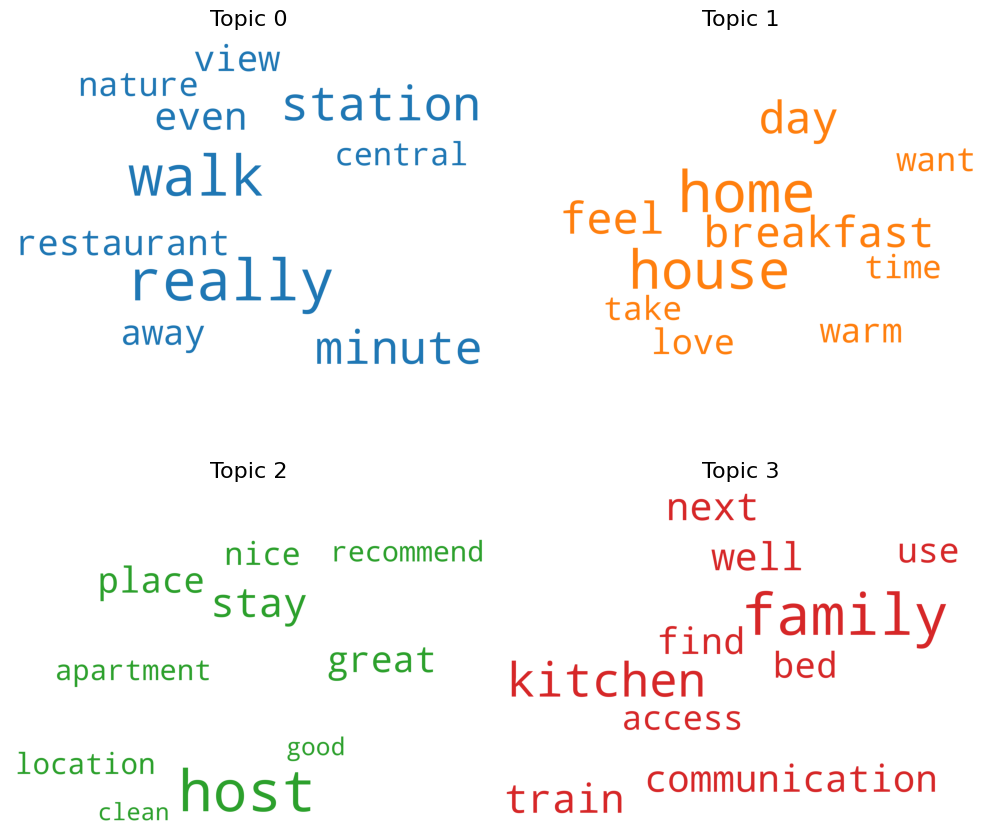

In [54]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [55]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.368139 -0.024078       1        1  55.837416
3     -0.045034  0.169411       2        1  16.416133
0     -0.147514 -0.321471       3        1  15.033734
1     -0.175591  0.176138       4        1  12.712718, topic_info=          Term          Freq         Total Category  logprob  loglift
27        host  15364.000000  15364.000000  Default  30.0000  30.0000
84      really   1986.000000   1986.000000  Default  29.0000  29.0000
34        stay   6335.000000   6335.000000  Default  28.0000  28.0000
88        walk   1915.000000   1915.000000  Default  27.0000  27.0000
268       home   1737.000000   1737.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
438  breakfast    930.606263   1773.630613   Topic4  -3.5075   1.4176
64        time    501.090132   1768.334219   Topic4  -4.1266   0.8016
369     enough    230.139976    389.029726   Topic4  -4.9047   1.5376
11      little    220.498315    383.522009   Topic4  -4.9475   1.5091
279         go    217.594999    872.885442   Topic4  -4.9607   0.6734

[179 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
709       3  0.994265           able
210       2  0.999476         access
298       4  0.994085  accommodation
436       4  0.994359          allow
247       1  0.726098           also
...     ...       ...            ...
162       2  0.373035           well
917       2  0.996183         window
237       1  0.999361      wonderful
634       2  0.997456           work
417       3  0.997913            yet

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [56]:
df.head()

,index,date,listing_id_encod,listing_id,reviewer_id,reviewer_name,comments,host_id,host_name,host_description,...,reviews_per_month,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,comments_language
0,0,2010-09-06,0.0,32984.0,200247.0,Keenan,great little apartment perfect spot town nice ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
1,1,2010-09-12,0.0,32984.0,126543.0,Olaf,nice flat great area host sorted things make s...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
2,2,2011-05-21,0.0,32984.0,294223.0,Max,great location host responsive email country t...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
3,3,2011-05-28,0.0,32984.0,577190.0,Eli,host place super great close everything quite ...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en
4,4,2011-06-11,0.0,32984.0,521818.0,Jonathan,nice apartment great location great price br b...,53396.0,Chris,"City Hall, Stockholm <b>The space</b><br />Bea...",...,0.16,0.0,4.23,4.43,3.81,4.29,4.52,4.81,4.2,en


In [57]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.5143,"really, walk, station, minute, even, view, res...","[great, little, apartment, perfect, spot, town..."
1,1,2,0.6926,"host, stay, great, place, nice, location, apar...","[nice, flat, great, area, host, sort, thing, m..."
2,2,2,0.7927,"host, stay, great, place, nice, location, apar...","[great, location, host, responsive, email, cou..."
3,3,0,0.4915,"really, walk, station, minute, even, view, res...","[host, place, super, great, close, quite, cent..."
4,4,2,0.7715,"host, stay, great, place, nice, location, apar...","[nice, apartment, great, location, great, pric..."


In [60]:
df_new = df_dominant_topic.merge(df, left_index=True, right_index=True)[['Dominant_Topic', 'Keywords', 'Text', 'comments', 'neighbourhood', 'latitude', 'longitude']]

In [76]:
counts = df_new.groupby(['neighbourhood', 'Dominant_Topic']).count().reset_index()

In [89]:
counts.sort_values('Keywords', ascending=False)

,neighbourhood,Dominant_Topic,Keywords,Text,comments,latitude,longitude
36,Södermalms,2,3204,3204,3204,3204,3204
44,Östermalms,2,1509,1509,1509,1509,1509
23,Norrmalms,2,1457,1457,1457,1457,1457
13,Hägersten-Liljeholmens,2,818,818,818,818,818
19,Kungsholmens,2,736,736,736,736,736
6,Enskede-Årsta-Vantörs,2,534,534,534,534,534
28,Skarpnäcks,2,377,377,377,377,377
32,Skärholmens,2,239,239,239,239,239
40,Älvsjö,2,215,215,215,215,215
2,Bromma,2,117,117,117,117,117
